# Unsupervised Learning Techniques

**Discussing 3 unsupervised learning techniques**

- clustering: group similar instances into clusters
- anomaly detection - learn what 'normal' data looks like then use this to detect abnormal instances
- density estimation - estimate the probability density function (PDF) of the random process that generated the dataset



## Clustering

**applications**
- customer segmentation
- EDA (identifying clusters in an unknown dataset)
- dimensionality reduction -> measure affinity
- anomaly / outlier detection
- semi-supervised learning: take a few labels and propagate those to all instances of the same cluster
- search engines
- image segmentation

### K-Means

code examples from the book:

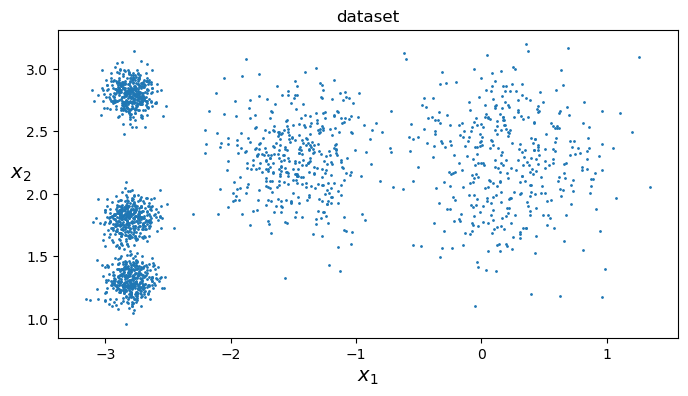

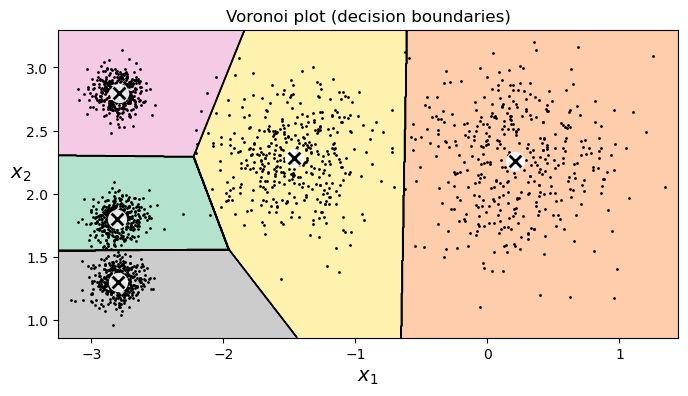

In [2]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.title("dataset")
plt.show()


from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.title("Voronoi plot (decision boundaries)")
plt.show()

- KMeans does not behave well when the blobs have different diameters


**the algorithm**

1. randomly determine centroids
2. for each point, assign it to the closest centroid
3. find the center (average) of those points
4. update the centroid to the mean of those points
5. Go back to 2 until the algorithm converges (i.e. the centroids stop moving)


**complexity**

Generally linear wtih number of instances (m), clusters (k), and dimensions (n) - however if the data doesn't have a clustering structure then complexity can increase exponentially. This rarely happens.

**methods of improving centroid initialization**

- take a guess as to where the centroids are and pass them when building the model

- run the algorithm multiple times and keep the best result
    - metric: *intertia* = the mean squared distance between each instance and it's closest centroid (i.e. rewards small / tight clusters)
    
- K-means++ initialization
    - select centroids that are distant from one another
    
- accelerated K-means
    - speeds up the algorithm by exploiting the triangle inequality and keeping track of lower and upper bounds for distances between instances and centroids
    
    
- mini-batch k-means